<a href="https://colab.research.google.com/github/SibelCakmak/FinalProject/blob/master/Gor%C3%BCnt%C3%BC_Isleme_Odev_Soblel_and_Prewitt_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

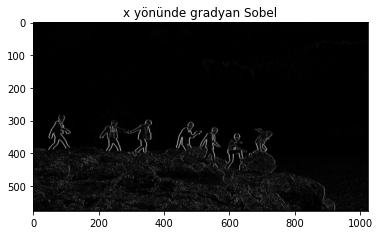

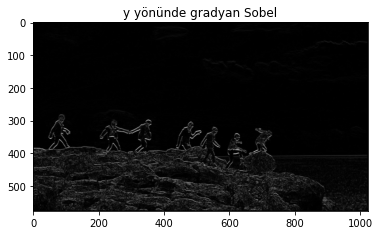

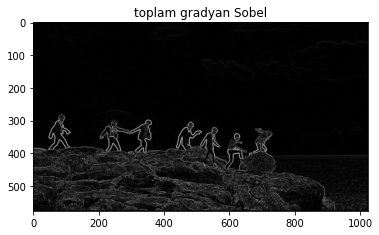

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# kullanılacak resim yüklenir ve  resmin matris değerleriyle işlem yapılacağı için resmi 8 bit olarak sayısal değerlere ayırır
img = np.array(Image.open('arrmy2.jpg')).astype(np.uint8)

# resmi siyah beyaza çevirmek için genel değerler hesaplanır
yeniImg = np.round(0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]).astype(np.uint8)

# yatay ve dikey kenarları çizmek için resme siyah beyaz filtre uygulanr
h, w = yeniImg.shape
# yatay kenar hesabı için sobel in  g(x) matrisi tanımlanır

# Gx = [-1, 0, 1]        Gy = [-1, -2, -1]
#      [2, 0, 2]              [0,  0,  0 ]
#      [-1, 0, 1]             [1,  2,  1 ]


yatay = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
# dikey kenar hesabı için sobel in  g(y) matrisi tanımlanır
dikey = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  
# gerçek görüntüde işlem yapmayacağımız için tüm pikselleri 0 dan oluşan yeni dikey yatay ve toplamı için gradyan oluşturururz.
# Hesaplanacak yeni işlemler buraya aktarılacak
yeniYatayGradyan = np.zeros((h, w))
yeniDikeyGradyan = np.zeros((h, w))
toplamGradyan = np.zeros((h, w))


# 3X3 lük matrisi mevcut resmin her tarafına uygulamak için for tanımlandı
for i in range(1, h - 1):
    for j in range(1, w - 1):
      # matrisi resimde seçili yerin bir yanına kayacak şekilde her yerin uygululanır
      # sayısal değere dönen resmin yatay işlmeleri yapılır. (matris denk geldiği yerl çarpılır ve her bir işlem toplanır)
        yatayGradyan = (yatay[0, 0] * yeniImg[i - 1, j - 1]) + \
                         (yatay[0, 1] * yeniImg[i - 1, j]) + \
                         (yatay[0, 2] * yeniImg[i - 1, j + 1]) + \
                         (yatay[1, 0] * yeniImg[i, j - 1]) + \
                         (yatay[1, 1] * yeniImg[i, j]) + \
                         (yatay[1, 2] * yeniImg[i, j + 1]) + \
                         (yatay[2, 0] * yeniImg[i + 1, j - 1]) + \
                         (yatay[2, 1] * yeniImg[i + 1, j]) + \
                         (yatay[2, 2] * yeniImg[i + 1, j + 1])
        # yapılan işlemin sonuçlarında negatif işlem dönerse eğer onu pozitif yapmak için mutlak değer alınır
        yeniYatayGradyan[i - 1, j - 1] = abs(yatayGradyan)
      # dikey kenarlar için yatayda olan aynı işlemler g(y) için uygulanır. 3x3 matrsi olduğu  ve her satırında işlem yapmak için 
      # dokuz işlem yapar her satırını toplarız.
        dikeyGradyan = (dikey[0, 0] * yeniImg[i - 1, j - 1]) + \
                       (dikey[0, 1] * yeniImg[i - 1, j]) + \
                       (dikey[0, 2] * yeniImg[i - 1, j + 1]) + \
                       (dikey[1, 0] * yeniImg[i, j - 1]) + \
                       (dikey[1, 1] * yeniImg[i, j]) + \
                       (dikey[1, 2] * yeniImg[i, j + 1]) + \
                       (dikey[2, 0] * yeniImg[i + 1, j - 1]) + \
                       (dikey[2, 1] * yeniImg[i + 1, j]) + \
                       (dikey[2, 2] * yeniImg[i + 1, j + 1])
        # yapılan işlemin sonuçlarında negatif işlem dönerse eğer onu pozitif yapmak için mutlak değer alınır
        yeniDikeyGradyan[i - 1, j - 1] = abs(dikeyGradyan)
        # X ve Y değerlerini toplar sobel ile yeni oluşmuş görüntüyü çıkarırız
        toplamGradyan[i - 1, j - 1] = np.sqrt(pow(yatayGradyon, 2.0) + pow(dikeyGradyan, 2.0))
plt.title('x yönünde gradyan Sobel')
plt.imshow(yeniYatayGradyan, cmap='gray')
plt.show()
plt.title('y yönünde gradyan Sobel')
plt.imshow(yeniDikeyGradyan, cmap='gray')
plt.show()
plt.title('toplam gradyan Sobel')
plt.imshow(toplamGradyan, cmap='gray')
plt.show()

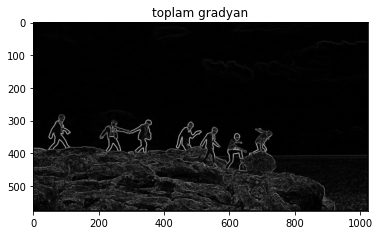

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# kullanılacak resim yüklenir ve  resmin matris değerleriyle işlem yapılacağı için resmi 8 bit olarak sayısal değerlere ayırır
img = np.array(Image.open('arrmy2.jpg')).astype(np.uint8)
# resmi siyah beyaza çevirmek için genel değerler hesaplanır
yeniImg = np.round(0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]).astype(np.uint8)
# yatay ve dikey kenarları çizmek için resme siyah beyaz filtre uygulanr
h, w = yeniImg.shape
# yatay kenar hesabı için sobel in  g(x) matrisi tanımlanır
# Gx = [-1, 0, 1]        Gy = [-1, -1, -1]
#      [-1, 0, 1]             [0,  0,  0 ]
#      [-1, 0, 1]             [1,  1,  1 ]

yatay = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# dikey kenar hesabı için sobel in  g(y) matrisi tanımlanır
dikey = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  
# yeni yasaplanacak olan matris değerlerinin toplamı için tüm pikselleri 0 dan oluşan yer tanımlandı
toplamGradyan  = np.zeros((h, w))
# 3X3 lük matrisi mevcut resmin her tarafına uygulamak için for tanımlandı
for i in range(1, h - 1):
    for j in range(1, w - 1):
     # matrisi resimde seçili yerin bir yanına kayacak şekilde her yerin uygululanır
      # sayısal değere dönen resmin yatay işlmeleri yapılır. 
      #(matris denk geldiği yerl çarpılır ve her bir işlem toplanır)
        yatayGradyan =   (yatay[0, 0] * yeniImg[i - 1, j - 1]) + \
                         (yatay[0, 1] * yeniImg[i - 1, j]) + \
                         (yatay[0, 2] * yeniImg[i - 1, j + 1]) + \
                         (yatay[1, 0] * yeniImg[i, j - 1]) + \
                         (yatay[1, 1] * yeniImg[i, j]) + \
                         (yatay[1, 2] * yeniImg[i, j + 1]) + \
                         (yatay[2, 0] * yeniImg[i + 1, j - 1]) + \
                         (yatay[2, 1] * yeniImg[i + 1, j]) + \
                         (yatay[2, 2] * yeniImg[i + 1, j + 1])
       # dikey kenarlar için yatayda olan aynı işlemler g(y) için uygulanır. 3x3 matrsi olduğu  ve her satırında işlem yapmak için 
      # dokuz işlem yapar her satırını toplarız.
        dikeyGradyan = (dikey[0, 0] * yeniImg[i - 1, j - 1]) + \
                       (dikey[0, 1] * yeniImg[i - 1, j]) + \
                       (dikey[0, 2] * yeniImg[i - 1, j + 1]) + \
                       (dikey[1, 0] * yeniImg[i, j - 1]) + \
                       (dikey[1, 1] * yeniImg[i, j]) + \
                       (dikey[1, 2] * yeniImg[i, j + 1]) + \
                       (dikey[2, 0] * yeniImg[i + 1, j - 1]) + \
                       (dikey[2, 1] * yeniImg[i + 1, j]) + \
                       (dikey[2, 2] * yeniImg[i + 1, j + 1])
        # X ve Y değerlerini toplar sobel ile yeni oluşmuş görüntüyü çıkarırız
        toplamGradyan[i - 1, j - 1] = np.sqrt(pow(yatayGradyan, 2.0) + pow(dikeyGradyan, 2.0))
plt.title('toplam gradyan')
plt.imshow(toplamGradyan, cmap='gray')
plt.show()